In [133]:
#import packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score

In [5]:
#Load the files
df = pd.read_csv('eda.csv')
authors = pd.read_csv('author_sum.csv')

In [6]:
df=df.drop(labels=2776, axis=0)
df=df.drop(labels=['Unnamed: 0', 'given_name', 'last_name'], axis=1)


In [8]:
#Making sure there's the same number of id's as authors

print(df.person_id.nunique(), df.full_name.nunique())

1772 1772


In [9]:
#Here are the different prizes with counts 

df.prize_name.value_counts()

Arts and Letters Awards                                       609
Whiting Award                                                 348
Pulitzer Prize                                                196
National Book Award                                           149
Poet Laureate                                                 129
Lannan Award                                                  105
Ruth Lilly And Dorothy Sargent Rosenberg Poetry Fellowship     94
MacArthur Fellowship                                           89
Academy of American Poets Fellowship                           88
USA Fellowship                                                 78
Lannan Fellowship                                              72
Rosenthal Family Foundation Award                              64
Bollingen Prize for Poetry                                     52
Lenore Marshall Poetry Prize                                   46
Hemingway Award for Debut Novel                                45
Harold D. 

In [10]:
#How many awards for each amount of money
df.prize_amount.value_counts()

10000.0     1069
50000.0      517
15000.0      329
25000.0      204
35000.0      129
100000.0     106
150000.0     102
25800.0       81
500000.0      69
20000.0       62
40000.0       34
165000.0      26
625000.0      20
75000.0       18
200000.0      10
Name: prize_amount, dtype: int64

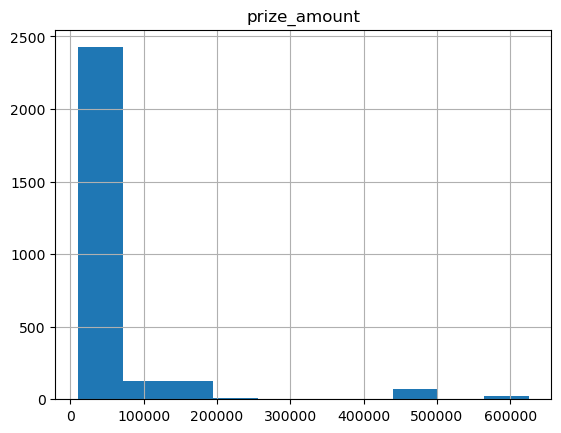

In [11]:
df.hist('prize_amount');

In [12]:
len(df.prize_name.value_counts())

51

In [12]:
names = np.array(df.prize_name)

In [13]:
names_array = np.unique(names)

In [14]:
prize_name_by_school = df[['prize_name', 'mfa_degree']].groupby(['prize_name']).value_counts().copy()

In [15]:
prize_name_by_school

prize_name                            mfa_degree                          
Academy of American Poets Fellowship  no mfa                                  76
                                      University of Iowa                       5
                                      Columbia University                      3
                                      Bowling Green State University           1
                                      University of Massachusetts, Amherst     1
                                                                              ..
Windham Campbell Prize                no mfa                                  20
                                      New York University                      2
                                      University of Iowa                       2
                                      SUNY Brookport                           1
                                      Bowling Green State University           1
Length: 443, dtype: int64

In [16]:
prize_name_by_school['Windham Campbell Prize'].index

Index(['no mfa', 'New York University', 'University of Iowa', 'SUNY Brookport',
       'Bowling Green State University'],
      dtype='object', name='mfa_degree')

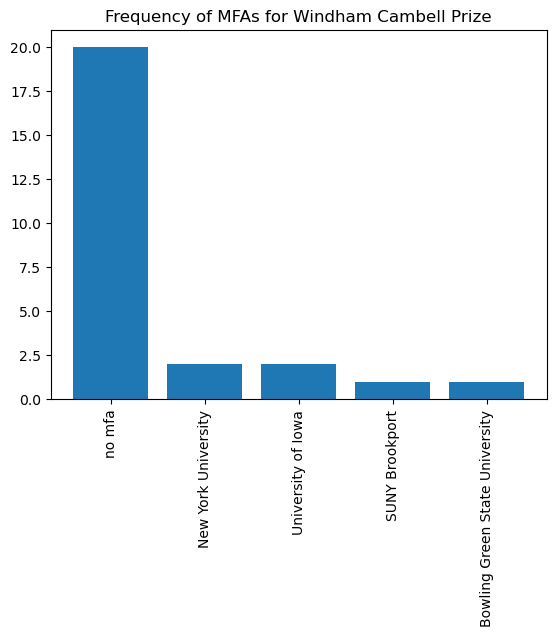

In [17]:
plt.bar(x=prize_name_by_school['Windham Campbell Prize'].index, height=prize_name_by_school['Windham Campbell Prize'])
plt.xticks(rotation=90)
plt.title('Frequency of MFAs for Windham Cambell Prize')
plt.show()

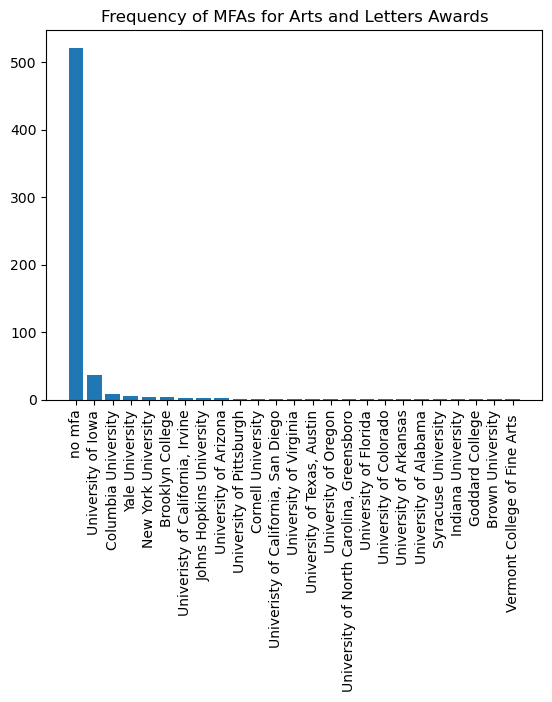

In [18]:
plt.bar(x=prize_name_by_school['Arts and Letters Awards'].index, height=prize_name_by_school['Arts and Letters Awards'])
plt.xticks(rotation=90)
plt.title('Frequency of MFAs for Arts and Letters Awards')
plt.show()

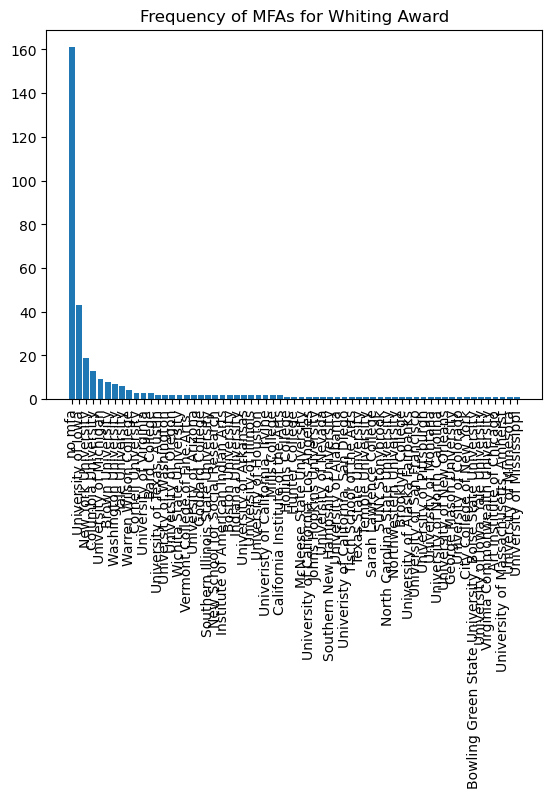

In [19]:

plt.bar(x=prize_name_by_school['Whiting Award'].index, height=prize_name_by_school['Whiting Award'])
plt.xticks(rotation=90)
plt.title('Frequency of MFAs for Whiting Award')
plt.show()

In [20]:
authors=authors.drop(labels='Unnamed: 0', axis=1)
authors

,person_id,full_name,gender,graduate_degree,mfa_degree,award,prize_amount
0,1.0,A. B. Guthrie Jr,male,0,no mfa,1.0,15000.0
1,2.0,A. E. Stallings,female,1,no mfa,3.0,570000.0
2,3.0,A. G. Mojtabai,female,1,no mfa,2.0,20000.0
3,4.0,A. J. Verdelle,female,1,Bard College,2.0,70000.0
4,6.0,A. R. Ammons,male,1,no mfa,9.0,900000.0
...,...,...,...,...,...,...,...
1767,2405.0,Yxta Maya Murray,female,1,no mfa,1.0,50000.0
1768,2406.0,Z. Z. Packer,female,1,University of Iowa,1.0,50000.0
1769,2407.0,Zachary Lazar,male,1,University of Iowa,1.0,20000.0
1770,2409.0,Zarina Mullan Plath,female,0,no mfa,1.0,15000.0


Wait! I just realized, there's nothing about elite colleges in this data set! 

Also, so that I preserve some of the other information, I'm going to make some new features using one-hot encoding!

In [21]:
df=pd.get_dummies(df,columns=['prize_type'], prefix='Type')

In [22]:
df=pd.get_dummies(df,columns=['prize_genre'], prefix='Genre')

In [23]:
df

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,Type_book,Type_career,Genre_no genre,Genre_poetry,Genre_prose
0,1891.0,Reuben Bercovitch,male,0.0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979.0,10000.0,NaN,NaN,NaN,1.0,1,0,0,0,1
1,1807.0,Pauline Hanson,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972.0,10000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
2,1033.0,Jean Valentine,female,1.0,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,10000.0,Radcliffe College,NaN,NaN,1.0,0,1,0,1,0
3,123.0,Andrea Lawlor,nonbinary/they,1.0,"University of Massachusetts, Amherst",winner,Whiting Foundation,Whiting Award,2020.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
4,1295.0,Kayleb Rae Candrilli,nonbinary/they,1.0,University of Alabama,winner,Whiting Foundation,Whiting Award,2019.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,2210.0,Tessa Hadley,female,0.0,no mfa,winner,Yale University,Windham Campbell Prize,2016.0,165000.0,NaN,NaN,NaN,1.0,0,1,0,0,1
2772,2247.0,Timberlake Wertenbaker,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1989.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
2773,2253.0,Tina Howe,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1993.0,10000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
2774,2399.0,Yannick Murphy,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1990.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0


In [24]:
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'Type_book': 'sum', 
                     'Type_career': 'sum',
                     'Genre_poetry': 'sum', 
                     'Genre_prose': 'sum'}).reset_index()

In [25]:
a

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
0,32.0,Akhil Sharma,male,1.0,no mfa,Princeton University,Stanford University,Harvard University,2.0,60000.0,1,1,0,1
1,1317.0,Kevin Young,male,1.0,Brown University,Harvard University,Brown University,Stanford University,2.0,75000.0,1,1,1,0
2,1758.0,Ottessa Moshfegh,female,1.0,Brown University,Barnard College,Brown University,Stanford University,1.0,10000.0,1,0,0,1
3,1912.0,Richard Price,male,1.0,Columbia University,Cornell University,Columbia University,Stanford University,1.0,10000.0,0,1,0,0
4,2276.0,Tracy Smith,female,1.0,Columbia University,Harvard University,Columbia University,Stanford University,6.0,195000.0,1,5,5,0
5,2279.0,Trudy Dittmar,female,1.0,Columbia University,University of Pennsylvania,University of Chicago,Columbia University,1.0,50000.0,0,1,0,0


This is only giving me 6 people. I have to add none, to elite_1, 2, 3!

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   person_id          2776 non-null   float64
 1   full_name          2776 non-null   object 
 2   gender             2776 non-null   object 
 3   graduate_degree    2776 non-null   float64
 4   mfa_degree         2776 non-null   object 
 5   role               2776 non-null   object 
 6   prize_institution  2776 non-null   object 
 7   prize_name         2776 non-null   object 
 8   prize_year         2776 non-null   float64
 9   prize_amount       2776 non-null   float64
 10  elite_1            1096 non-null   object 
 11  elite_2            137 non-null    object 
 12  elite_3            13 non-null     object 
 13  award              2776 non-null   float64
 14  Type_book          2776 non-null   uint8  
 15  Type_career        2776 non-null   uint8  
 16  Genre_no genre     2776 

In [27]:
df.elite_1.fillna('None', inplace=True)
df.elite_2.fillna('None', inplace=True)
df.elite_3.fillna('None', inplace=True)

In [28]:
df

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,Type_book,Type_career,Genre_no genre,Genre_poetry,Genre_prose
0,1891.0,Reuben Bercovitch,male,0.0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979.0,10000.0,None,None,None,1.0,1,0,0,0,1
1,1807.0,Pauline Hanson,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972.0,10000.0,None,None,None,1.0,0,1,1,0,0
2,1033.0,Jean Valentine,female,1.0,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,10000.0,Radcliffe College,None,None,1.0,0,1,0,1,0
3,123.0,Andrea Lawlor,nonbinary/they,1.0,"University of Massachusetts, Amherst",winner,Whiting Foundation,Whiting Award,2020.0,50000.0,None,None,None,1.0,0,1,1,0,0
4,1295.0,Kayleb Rae Candrilli,nonbinary/they,1.0,University of Alabama,winner,Whiting Foundation,Whiting Award,2019.0,50000.0,None,None,None,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,2210.0,Tessa Hadley,female,0.0,no mfa,winner,Yale University,Windham Campbell Prize,2016.0,165000.0,None,None,None,1.0,0,1,0,0,1
2772,2247.0,Timberlake Wertenbaker,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1989.0,50000.0,None,None,None,1.0,0,1,1,0,0
2773,2253.0,Tina Howe,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1993.0,10000.0,None,None,None,1.0,0,1,1,0,0
2774,2399.0,Yannick Murphy,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1990.0,50000.0,None,None,None,1.0,0,1,1,0,0


In [30]:
#Let's try this again
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'Type_book': 'sum', 
                     'Type_career': 'sum',
                     'Genre_poetry': 'sum', 
                     'Genre_prose': 'sum'}).reset_index()

In [31]:
a

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
0,1.0,A. B. Guthrie Jr,male,0.0,no mfa,None,None,None,1.0,15000.0,1,0,0,1
1,2.0,A. E. Stallings,female,1.0,no mfa,None,None,None,3.0,570000.0,0,3,0,0
2,3.0,A. G. Mojtabai,female,1.0,no mfa,Columbia University,None,None,2.0,20000.0,1,1,0,1
3,4.0,A. J. Verdelle,female,1.0,Bard College,University of Chicago,None,None,2.0,70000.0,0,2,0,1
4,6.0,A. R. Ammons,male,1.0,no mfa,None,None,None,9.0,900000.0,2,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2405.0,Yxta Maya Murray,female,1.0,no mfa,None,None,None,1.0,50000.0,0,1,0,0
1771,2406.0,Z. Z. Packer,female,1.0,University of Iowa,Yale University,Stanford University,None,1.0,50000.0,0,1,0,0
1772,2407.0,Zachary Lazar,male,1.0,University of Iowa,Brown University,None,None,1.0,20000.0,0,1,0,0
1773,2409.0,Zarina Mullan Plath,female,0.0,no mfa,None,None,None,1.0,15000.0,0,1,1,0


In [32]:
#I shouldn't have 1775 rows though. I need to find duplicates.

a[a.full_name.duplicated()]

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0
1368,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0
1738,2362.0,William Gaddis,male,0.0,no mfa,None,None,None,1.0,10000.0,1,0,0,1


In [33]:
#Okay, let's try this again

a.loc[a['full_name']=='Campbell McGrath'] 

#I thought I took care of him before...is there a typo? 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0


In [34]:
#Checks out here
a.loc[a['mfa_degree']=='Columbia University'] 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
189,274.0,Brenda Shaughnessy,female,1.0,Columbia University,Columbia University,None,None,1.0,10000.0,0,1,0,0
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0
232,326.0,Carolyn Cooke,female,1.0,Columbia University,Columbia University,None,None,1.0,25000.0,1,0,0,1
239,335.0,Catherine Bowman,female,1.0,Columbia University,Columbia University,None,None,1.0,10000.0,1,0,1,0
240,336.0,Catherine Lacey,female,1.0,Columbia University,Columbia University,None,None,1.0,50000.0,0,1,0,0
264,367.0,Charlotte Bacon,female,1.0,Columbia University,Harvard University,Columbia University,None,1.0,10000.0,1,0,0,1
297,410.0,Clarence Coo,male,1.0,Columbia University,Columbia University,None,None,1.0,50000.0,0,1,0,0
301,415.0,Claudia Rankine,female,1.0,Columbia University,Columbia University,None,None,7.0,945000.0,0,7,5,0
325,446.0,Cyree Jarelle Johnson,male,1.0,Columbia University,Columbia University,None,None,1.0,25800.0,0,1,1,0


In [35]:
#Okay, he's here too
a.loc[a['elite_1']=='University of Chicago'] 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
3,4.0,A. J. Verdelle,female,1.0,Bard College,University of Chicago,None,None,2.0,70000.0,0,2,0,1
11,18.0,Adria Bernardi,female,1.0,no mfa,University of Chicago,None,None,1.0,15000.0,1,0,0,1
170,243.0,Bette Howland,female,0.0,no mfa,University of Chicago,None,None,1.0,500000.0,0,1,0,0
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0
226,317.0,Carol Brightman,female,1.0,no mfa,University of Chicago,None,None,1.0,10000.0,0,1,0,0
363,493.0,Daryl Hine,male,1.0,no mfa,University of Chicago,None,None,2.0,510000.0,0,2,0,0
498,666.0,Elizabeth Arnold,female,1.0,no mfa,University of Chicago,None,None,1.0,50000.0,0,1,0,0
585,800.0,George Dillon,male,0.0,no mfa,University of Chicago,None,None,1.0,15000.0,1,0,1,0
637,869.0,Hayden Carruth,male,1.0,no mfa,University of Chicago,None,None,6.0,355000.0,2,4,5,0


In [36]:
#I found it! Columbia has a space in front of it WOMP WOMP

a.loc[a['elite_2']==' Columbia University'] 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
127,185.0,Ariana Reines,female,1.0,no mfa,Barnard College,Columbia University,None,1.0,100000.0,1,0,0,1
144,206.0,Ayad Akhtar,male,1.0,no mfa,Brown University,Columbia University,None,1.0,10000.0,0,1,0,0
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
264,367.0,Charlotte Bacon,female,1.0,Columbia University,Harvard University,Columbia University,None,1.0,10000.0,1,0,0,1
407,552.0,Davidr Slavitt,male,1.0,no mfa,Yale University,Columbia University,None,1.0,10000.0,0,1,0,0
542,730.0,F. D. Reeve,male,1.0,no mfa,Princeton University,Columbia University,None,1.0,10000.0,0,1,0,0
613,837.0,Gregory Rabassa,male,1.0,no mfa,Dartmouth College,Columbia University,None,1.0,10000.0,0,1,0,0
639,871.0,Heidi Durrow,female,1.0,no mfa,Stanford University,Columbia University,None,1.0,25000.0,1,0,0,1
803,1082.0,Joan Kane,female,1.0,Columbia University,Harvard University,Columbia University,None,1.0,50000.0,0,1,0,0
817,1102.0,John Ashberry,male,1.0,no mfa,Harvard University,Columbia University,None,2.0,40000.0,1,1,2,0


In [37]:
df.loc[df['full_name']=='Campbell McGrath']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,Type_book,Type_career,Genre_no genre,Genre_poetry,Genre_prose
192,308.0,Campbell McGrath,male,1.0,Columbia University,winner,Claremont Graduate University,Kingsley Tufts Poetry Award,1997.0,100000.0,University of Chicago,Columbia University,None,1.0,1,0,0,1,0
776,308.0,Campbell McGrath,male,1.0,Columbia University,winner,"United States Artists (Ford, Rockefeller, Rasm...",USA Fellowship,2011.0,50000.0,University of Chicago,Columbia University,None,1.0,0,1,1,0,0
1527,308.0,Campbell McGrath,male,1.0,Columbia University,winner,MacArthur Foundation,MacArthur Fellowship,1999.0,625000.0,University of Chicago,Columbia University,None,1.0,0,1,1,0,0


In [38]:
df.loc[1527, 'elite_2'] = ' Columbia University'

In [39]:
a.loc[a['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
1367,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,1,0
1368,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0


In [40]:
df.loc[df['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
2383,1857.0,Rachel Hadas,female,1.0,no mfa,winner,Folger Shakespeare Library,O. B. Hardison Poetry Prize,2000.0,10000.0,Radcliffe College,Princeton University,None,1.0,0,1,0,1,0
2399,1857.0,Rachel Hadas,female,1.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1990.0,10000.0,Radcliffe College,None,None,1.0,0,1,1,0,0


In [40]:
df.loc[2399, 'elite_2'] ='Princeton University'

In [41]:
df.loc[df['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,Type_book,Type_career,Genre_no genre,Genre_poetry,Genre_prose
2383,1857.0,Rachel Hadas,female,1.0,no mfa,winner,Folger Shakespeare Library,O. B. Hardison Poetry Prize,2000.0,10000.0,Radcliffe College,Princeton University,None,1.0,0,1,0,1,0
2399,1857.0,Rachel Hadas,female,1.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1990.0,10000.0,Radcliffe College,Princeton University,None,1.0,0,1,1,0,0


In [42]:
a.loc[a['full_name']== 'William Gaddis']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
1737,2362.0,William Gaddis,male,0.0,no mfa,Harvard University,None,None,4.0,670000.0,1,3,0,1
1738,2362.0,William Gaddis,male,0.0,no mfa,None,None,None,1.0,10000.0,1,0,0,1


In [43]:
df.loc[df['full_name']== 'William Gaddis']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,Type_book,Type_career,Genre_no genre,Genre_poetry,Genre_prose
312,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1976.0,10000.0,None,None,None,1.0,1,0,0,0,1
450,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1994.0,10000.0,Harvard University,None,None,1.0,1,0,0,0,1
1455,2362.0,William Gaddis,male,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1963.0,10000.0,Harvard University,None,None,1.0,0,1,1,0,0
1456,2362.0,William Gaddis,male,0.0,no mfa,winner,Lannan Foundation,Lannan Lifetime Achievement Award,1993.0,150000.0,Harvard University,None,None,1.0,0,1,1,0,0
1457,2362.0,William Gaddis,male,0.0,no mfa,winner,MacArthur Foundation,MacArthur Fellowship,1982.0,500000.0,Harvard University,None,None,1.0,0,1,1,0,0


In [45]:
df.loc[312, 'elite_1'] ='Harvard University'

In [46]:
df.loc[df['full_name']== 'William Gaddis']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,Type_book,Type_career,Genre_no genre,Genre_poetry,Genre_prose
312,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1976.0,10000.0,Harvard University,None,None,1.0,1,0,0,0,1
450,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1994.0,10000.0,Harvard University,None,None,1.0,1,0,0,0,1
1455,2362.0,William Gaddis,male,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1963.0,10000.0,Harvard University,None,None,1.0,0,1,1,0,0
1456,2362.0,William Gaddis,male,0.0,no mfa,winner,Lannan Foundation,Lannan Lifetime Achievement Award,1993.0,150000.0,Harvard University,None,None,1.0,0,1,1,0,0
1457,2362.0,William Gaddis,male,0.0,no mfa,winner,MacArthur Foundation,MacArthur Fellowship,1982.0,500000.0,Harvard University,None,None,1.0,0,1,1,0,0


Okay, let's try this one more time! 

In [47]:
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'Type_book': 'sum', 
                     'Type_career': 'sum',
                     'Genre_poetry': 'sum', 
                     'Genre_prose': 'sum'}).reset_index()

In [48]:
a[a.full_name.duplicated()]

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
1367,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,0,0


In [49]:
#okay, clean clean clean
a.loc[a['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
1366,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,1,0
1367,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,0,0


In [50]:
a.loc[a['elite_1']== 'Radcliffe College']

#not it

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
17,25.0,Adrienne Rich,female,1.0,no mfa,Radcliffe College,None,None,8.0,920000.0,2,6,6,0
47,72.0,Alice Adams,female,0.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0
54,85.0,Alison Lurie,female,0.0,no mfa,Radcliffe College,None,None,2.0,25000.0,1,1,0,1
93,140.0,Ann Arsensberg,female,1.0,no mfa,Radcliffe College,Harvard University,None,1.0,10000.0,1,0,0,1
465,626.0,Edith Pearlman,female,0.0,no mfa,Radcliffe College,None,None,1.0,15000.0,1,0,0,1
549,742.0,Frances Fitzgerald,female,0.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0
767,1033.0,Jean Valentine,female,1.0,no mfa,Radcliffe College,None,None,5.0,140000.0,1,4,4,0
946,1273.0,Katha Pollitt,female,1.0,Columbia University,Radcliffe College,Columbia University,None,1.0,50000.0,0,1,0,0
1034,1396.0,Lily Tuck,female,1.0,no mfa,Radcliffe College,None,None,1.0,10000.0,1,0,0,1
1041,1405.0,Linda Pastan,female,0.0,no mfa,Radcliffe College,None,None,1.0,100000.0,0,1,1,0


In [51]:
#The space again. Must have been when I split the column up
a.loc[a['elite_2']== ' Princeton University']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose
141,203.0,Austin Warren,male,1.0,no mfa,Harvard University,Princeton University,None,1.0,10000.0,0,1,0,0
568,771.0,Frederick Crews,male,1.0,no mfa,Yale University,Princeton University,None,1.0,15000.0,1,0,0,1
1135,1528.0,Mark Helprin,male,1.0,no mfa,Harvard University,Princeton University,None,1.0,40000.0,0,1,0,1
1365,1856.0,R. W. B. Lewis,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,0,0
1366,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,1,0
1647,2238.0,Thornton Wilder,male,1.0,no mfa,Yale University,Princeton University,None,2.0,25000.0,2,0,0,2
1714,2331.0,Wayne Koestenbaum,male,1.0,no mfa,Harvard University,Princeton University,None,2.0,60000.0,0,2,0,0


In [52]:
df.loc[2399, 'elite_2'] =' Princeton University'

In [53]:
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'Type_book': 'sum', 
                     'Type_career': 'sum',
                     'Genre_poetry': 'sum', 
                     'Genre_prose': 'sum'}).reset_index()
a[a.full_name.duplicated()]

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose


YESSSSSS!!!!

Need to one-hot encode all the rest of the categorical variables! Gender, mfa_degree, and elite_1-3 

In [54]:
cat_cols= ['gender', 'mfa_degree', 'elite_1', 'elite_2', 'elite_3']
prefixes = ['g', 'mfa', 'e1', 'e2', 'e3']
a=pd.get_dummies(a,columns=cat_cols, prefix=prefixes)


Now time to scale prize amount and number of awards!

In [55]:
a_scaled = a
scaler=StandardScaler()
scaler.fit(a_scaled[['prize_amount']])
a_scaled['prize_amount_scaled'] = scaler.transform(a_scaled[['prize_amount']])

In [56]:
scaler.fit(a_scaled[['award']])
a_scaled['num_award_scaled'] = scaler.transform(a_scaled[['award']])

In [57]:
a_scaled

,person_id,full_name,graduate_degree,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose,g_female,...,e2_ University of Chicago,e2_ University of Pennsylvania,e2_ Yale University,e2_None,e3_ Columbia University,e3_ Stanford University,e3_Harvard University,e3_None,prize_amount_scaled,num_award_scaled
0,1.0,A. B. Guthrie Jr,0.0,1.0,15000.0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,-0.441485,-0.434070
1,2.0,A. E. Stallings,1.0,3.0,570000.0,0,3,0,0,1,...,0,0,0,1,0,0,0,1,3.514992,1.098146
2,3.0,A. G. Mojtabai,1.0,2.0,20000.0,1,1,0,1,1,...,0,0,0,1,0,0,0,1,-0.405841,0.332038
3,4.0,A. J. Verdelle,1.0,2.0,70000.0,0,2,0,1,1,...,0,0,0,1,0,0,0,1,-0.049402,0.332038
4,6.0,A. R. Ammons,1.0,9.0,900000.0,2,7,7,0,0,...,0,0,0,1,0,0,0,1,5.867492,5.694795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,2405.0,Yxta Maya Murray,1.0,1.0,50000.0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,-0.191978,-0.434070
1768,2406.0,Z. Z. Packer,1.0,1.0,50000.0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,-0.191978,-0.434070
1769,2407.0,Zachary Lazar,1.0,1.0,20000.0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,-0.405841,-0.434070
1770,2409.0,Zarina Mullan Plath,0.0,1.0,15000.0,0,1,1,0,1,...,0,0,0,1,0,0,0,1,-0.441485,-0.434070


In [58]:
X = a_scaled.drop(columns=['person_id', 'full_name'])
y=a_scaled['prize_amount_scaled']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

It's time to do some modeling!!! 

Here are the requirements from Springboard:

Overview
The goal of the modeling step is to develop a final model that effectively predicts the
stated goal in the problem identification section. Review the types of models that would
be appropriate given your modeling response and the features in your dataset and build
two to three models. In addition to considering different algorithm types in your model
selection, also consider applying model hyperparameter tuning operations. Be sure to
define the metrics you use to choose your final model.

If you need a refresher about how to go about building a model, review the work you did
during the guided capstone and the unit about modeling.

Project Steps
Time Estimation: 10-15 Hours
Modeling
Goal: Build two to three different models and identify the best one.
● Fit your models with a training dataset

Hint: Try a number of different models: you will want to compare their outputs in the
model evaluation stage. For example, if you’re writing a classification model, you should
implement both an entropy model and a Gini impurity model. For hyperparameter tuning,
think of methods like cross-validation.

● Review model outcomes — Iterate over additional models as needed 
Hint: you may want to use standard model evaluation metrics such as accuracy, recall,
precision, and F1.

● Identify the final model that you think is the best model for this project
Hint: the most powerful model isn’t always the best one to use. Other considerations
include computational complexity, scalability, and maintenance costs.

Review the following questions and apply them to your analysis:

● Does my data involve a time series or forecasting? If so, am I splitting the train
and test data appropriately?

● Is my response variable continuous or categorical?

Let's start from the bottom: My response variable, prize_amount_scaled, is continuous. But now that I'm looking at it, couldn't I also be doing num_award_scaled? Do we care about the number of awards or the amount of awards? Doesn't matter at the moment. For now, let's start with a very simple linear model and then get into decision trees. 

In [60]:
#Let's try a simple linear regression

In [60]:
rgr = linear_model.LinearRegression()

In [61]:
X_train

,graduate_degree,award,prize_amount,Type_book,Type_career,Genre_poetry,Genre_prose,g_female,g_male,g_nonbinary/they,...,e2_ University of Chicago,e2_ University of Pennsylvania,e2_ Yale University,e2_None,e3_ Columbia University,e3_ Stanford University,e3_Harvard University,e3_None,prize_amount_scaled,num_award_scaled
652,1.0,1.0,50000.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,-0.191978,-0.434070
686,1.0,1.0,50000.0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,-0.191978,-0.434070
1731,0.0,2.0,160000.0,1,1,2,0,0,1,0,...,0,0,0,1,0,0,0,1,0.592189,0.332038
1535,1.0,2.0,100000.0,0,2,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0.164462,0.332038
667,1.0,10.0,245000.0,2,8,9,0,0,1,0,...,0,0,0,1,0,0,0,1,1.198136,6.460903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1.0,1.0,20000.0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,-0.405841,-0.434070
581,0.0,1.0,15000.0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,-0.441485,-0.434070
121,1.0,1.0,50000.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,-0.191978,-0.434070
1262,1.0,5.0,180000.0,1,4,4,0,0,1,0,...,0,0,0,0,0,0,0,1,0.734765,2.630362


In [62]:
X_train.iloc[:, [-1]]

,num_award_scaled
652,-0.434070
686,-0.434070
1731,0.332038
1535,0.332038
667,6.460903
...,...
1345,-0.434070
581,-0.434070
121,-0.434070
1262,2.630362


In [63]:
#Looks like this didn't work, just as expected. Required one feature
#that has to be numerical. I'm going to try to slice the X_train so
#that we only use the num_award_scaled feature 
c=X_train.iloc[:,[-1]]
c

rgr.fit(c, y_train)

LinearRegression()

In [64]:
d=X_test.iloc[:,[-1]]

y_pred = rgr.predict(d)

print('Coefficient: \n', rgr.coef_)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

print('Coefficicent of determination: %.2f' % r2_score(y_test, y_pred))

Coefficient: 
 [0.54949126]
Mean squared error: 0.70
Coefficicent of determination: 0.31


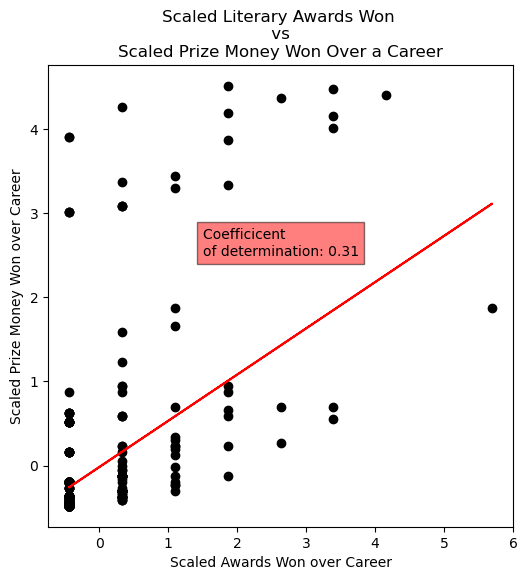

In [65]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(d, y_test, color='black')
ax.plot(d, y_pred, color='red')
ax.set_title('Scaled Literary Awards Won \n vs \nScaled Prize Money Won Over a Career')
ax.set_ylabel('Scaled Prize Money Won over Career')
ax.set_xlabel('Scaled Awards Won over Career')
ax.text(1.5,2.5, 
        'Coefficicent \nof determination: %.2f' % r2_score(y_test, y_pred),
       bbox = dict(facecolor = 'red', alpha = 0.5));

With a coefficient of determination of 0.31, we're closer to 0 (no correlation) than 1 (perfect correlation). This is not a great model in terms of telling us anything very interesting except that potentially, counterintuitively, the amount of money you win doesn't necessarily correlate to the amount of awards. Perhaps this is because some of the awards are worth so much more than other awards.

Let's try this with a Random Tree Regressor!

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [68]:
#Goint to fit using only one feature just like with the Linear 
#Regression model, and then try again with all the features.

rfr.fit(c, y_train)

RandomForestRegressor(random_state=42)

In [73]:
pred_rfr = rfr.predict(d)
mse_rfr=mean_squared_error(y_test, pred_rfr)
print(f'Mean Sqaured Error: {mse_rfr}')

Mean Sqaured Error: 0.709884985754699


In [137]:
test_score = rfr.score(d, y_test)
print('Decision Tree Regressor R-sqaured Score: {}'.format(test_score))

Decision Tree Regressor R-sqaured Score: 0.30006578429893016


WHOA this accuracy is terrible! What's going on here? 

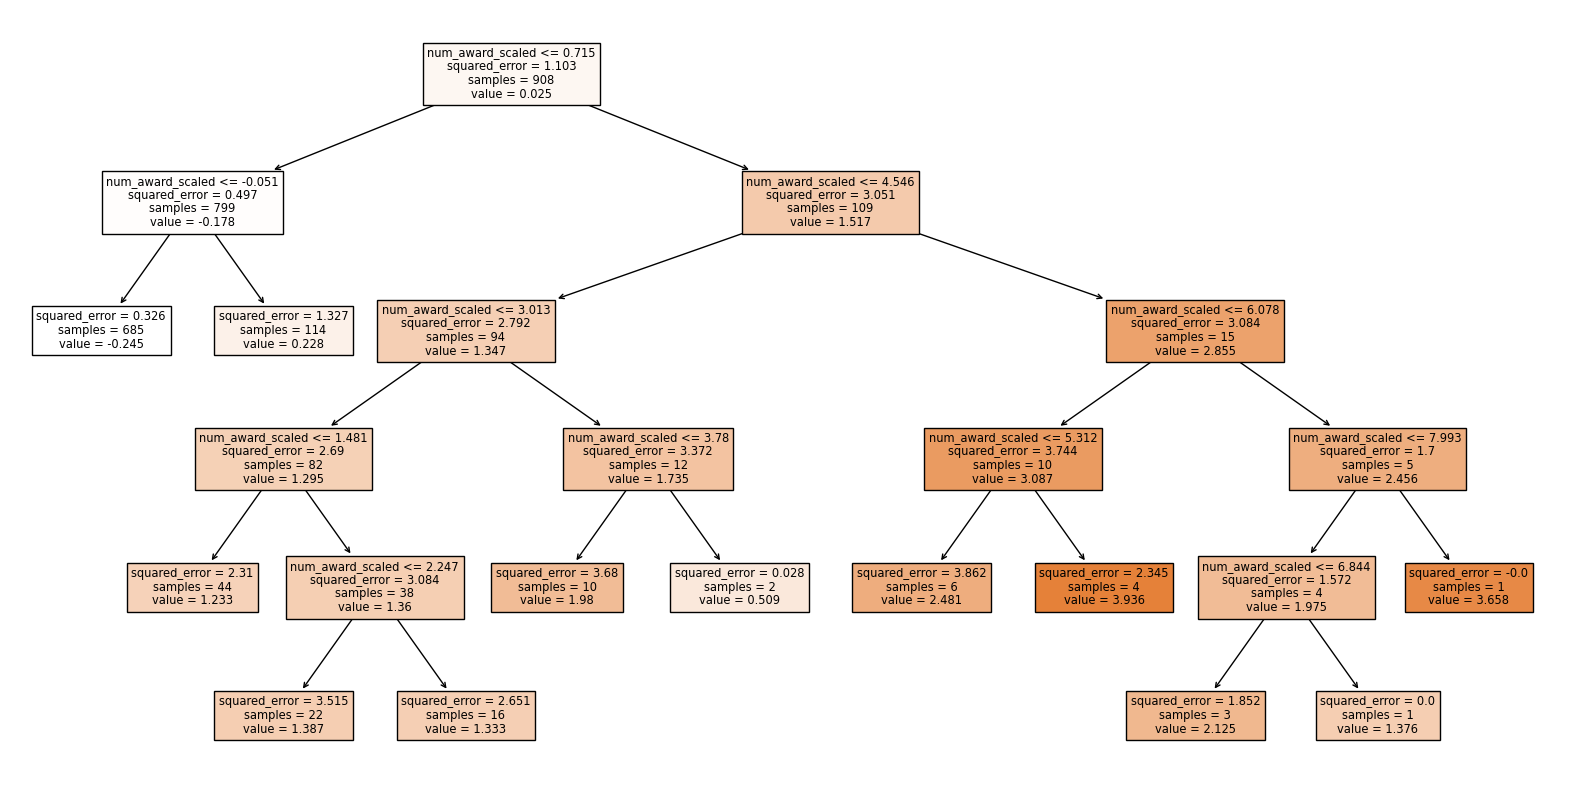

In [83]:
plt.figure(figsize=(20, 10))
plot_tree(rfr.estimators_[0], filled=True, feature_names=c.columns)
plt.show()


Let's try more regressions with all of the features...



In [84]:
from sklearn.tree import DecisionTreeRegressor

tc = DecisionTreeRegressor()
tc = tc.fit(X_train, y_train)

In [85]:
y_predict = tc.predict(X_test)

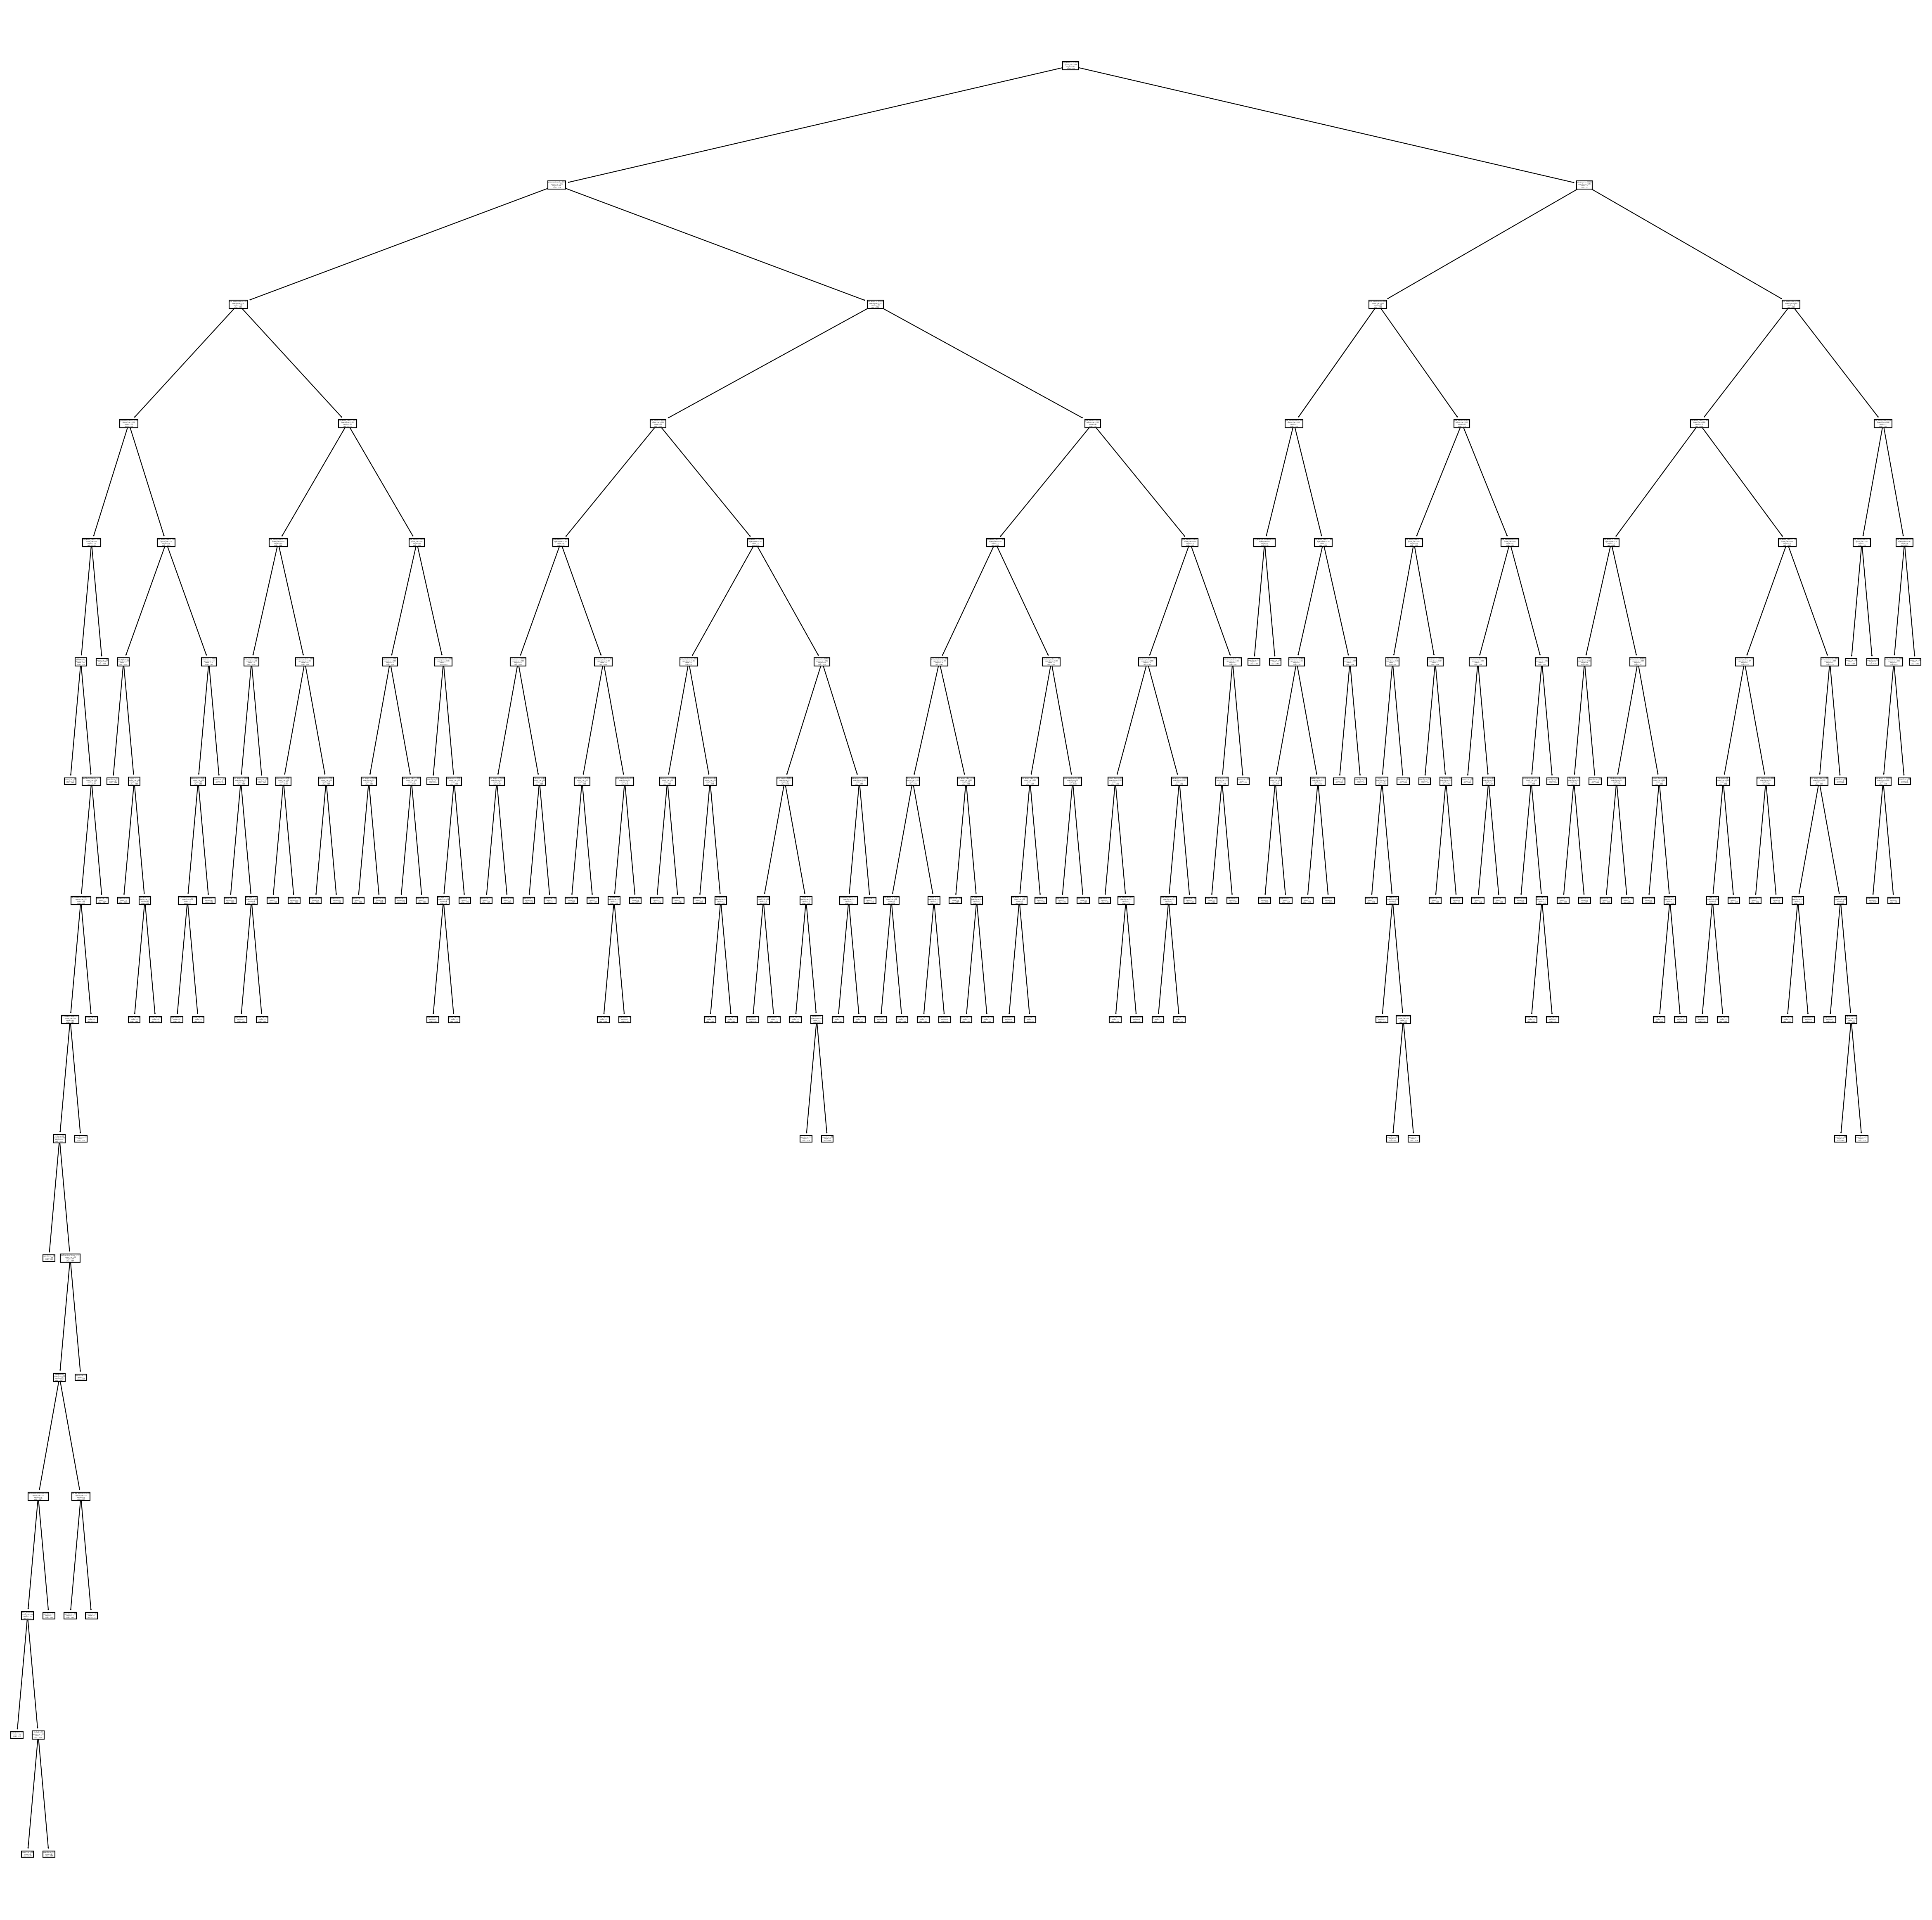

In [86]:

plt.figure(figsize=(40,40), dpi=150)
plot_tree(tc, feature_names=X.columns);

In [136]:
test_score = tc.score(X_test, y_test)
print('Decision Tree Regressor R-squared score: {}'.format(test_score))

Decision Tree Regressor R-squared score: 0.999784750507389


In [88]:
m = mean_squared_error(y_test, y_predict)
print('Decision Tree MSE: {}'.format(m))

Decision Tree MSE: 0.00021830963477451512


This has got to be WAY overfitted! We need to do some prunning! 

Let's try ExtraTreesRegressor to find the best features.

Extra Trees Regressor is like Random Forest but is quicker, leading to a higher bias and lower variance than Random Forest. We'll see how it goes!

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score as acc

reg = ExtraTreesRegressor(n_estimators=100, random_state=16)

reg.fit(X_train, y_train)

ExtraTreesRegressor(random_state=16)

In [93]:
fi = reg.feature_importances_

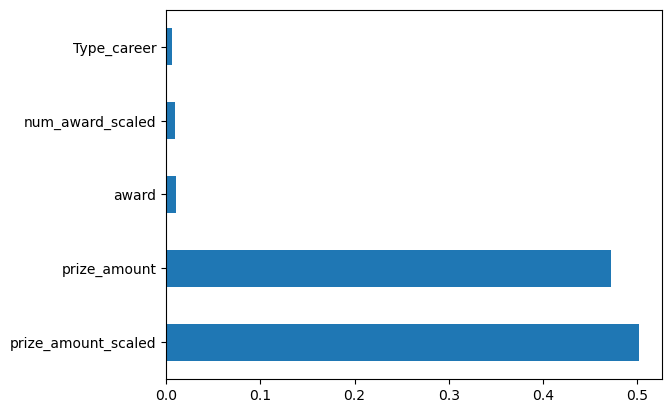

In [94]:
feat_importances = pd.Series(fi, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Well this does and does not makes sense. It definitely makes me rethink my features. I need to get rid of prize_amount, since it's scaled, as well as award. But prize_amount_scale is our target...why is it a feature in X_train? 

In [75]:
X_train.columns

Index(['graduate_degree', 'award', 'prize_amount', 'PT_book', 'PT_career',
       'PG_poetry', 'PG_prose', 'g_female', 'g_male', 'g_nonbinary/they',
       ...
       'e2_ University of Chicago', 'e2_ University of Pennsylvania',
       'e2_ Yale University', 'e2_None', 'e3_ Columbia University',
       'e3_ Stanford University', 'e3_Harvard University', 'e3_None',
       'prize_amount_scaled', 'num_award_scaled'],
      dtype='object', length=131)

Let's start over and remake X and y

In [95]:
X1 = a_scaled.drop(columns=['person_id', 'full_name', 'prize_amount_scaled',
                          'prize_amount', 'award'])
y1=a_scaled[['prize_amount_scaled']]

In [96]:
X_tr, X_te, y_tr, y_te = train_test_split(X1, y1, test_size=0.2, random_state=16)

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_82752/2065969459.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg1.fit(X_tr, y_tr)


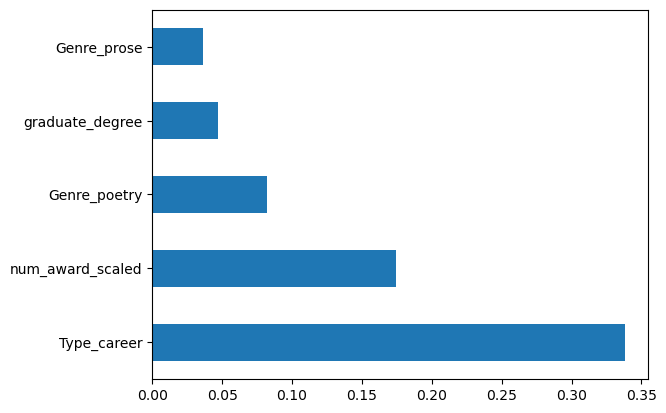

In [97]:
reg1 = ExtraTreesRegressor(n_estimators=100, random_state=16)

reg1.fit(X_tr, y_tr)
feat_importances1 = pd.Series(reg1.feature_importances_, index=X_tr.columns)
feat_importances1.nlargest(5).plot(kind='barh')
plt.show()

In [99]:
#Looking for the MSE

y_pred = reg1.predict(X_te)
etr_mse = mean_squared_error(y_te, y_pred)
print('Extra Tree Regressor MSE: {}'.format(etr_mse))

Extra Tree Regressor MSE: 0.867716200461349


In [135]:
etr_score = reg1.score(X_te, y_te)
print('Extra Tree Regressor R-squared Score: {}'.format(etr_score))

Extra Tree Regressor R-squared Score: 0.14444695914318917


This is way worse than the single decision tree, although, the decision tree got so accurate because of overfitting. Let's look at one tree.

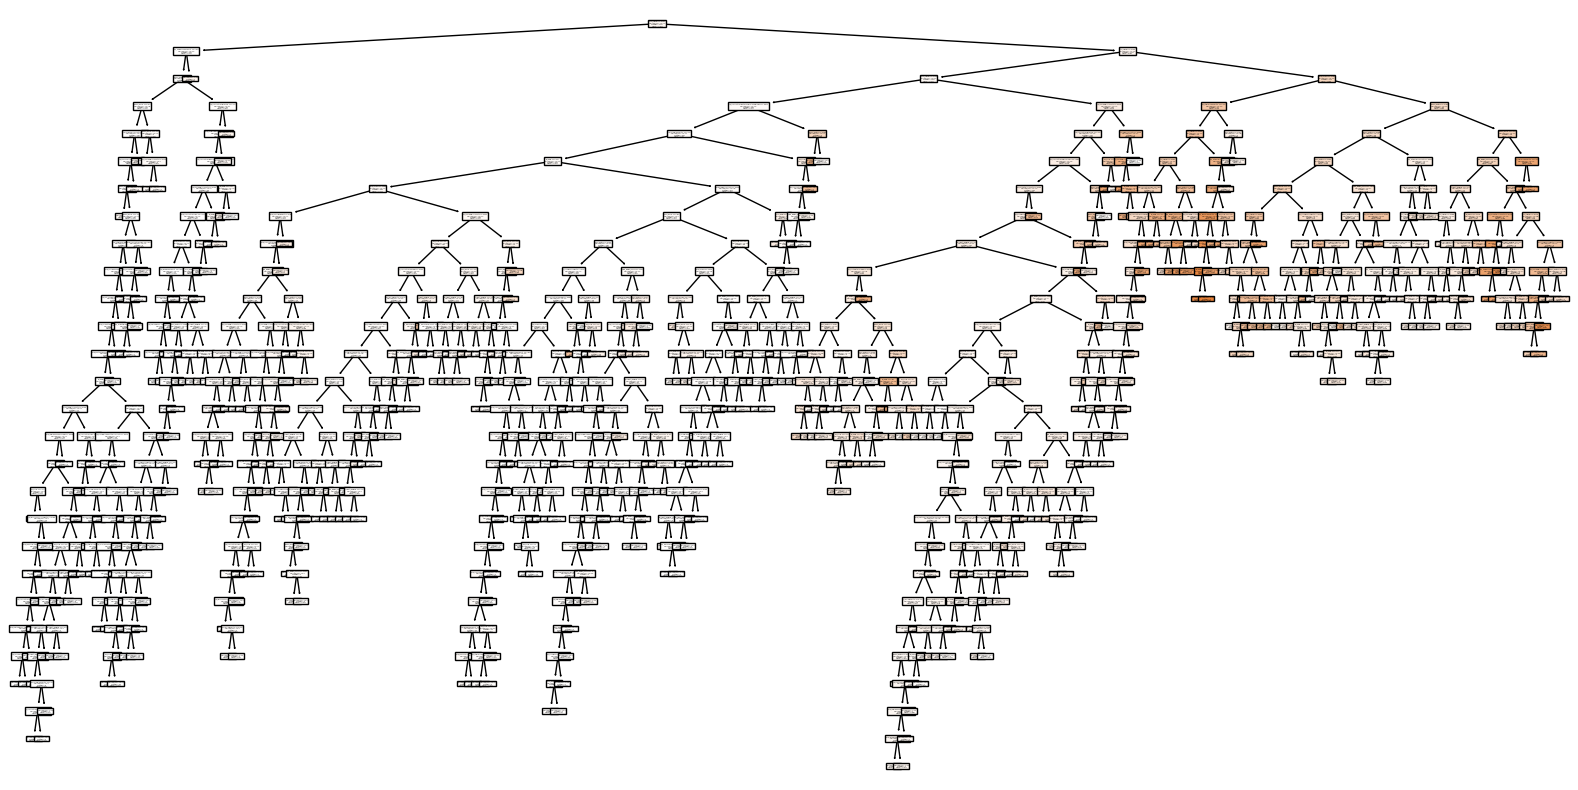

In [112]:
plt.figure(figsize=(20, 10))
plot_tree(reg1.estimators_[0], filled=True, feature_names=X_tr.columns)
plt.show()

I'd like to look a bit deeper into the prize amounts for different awards.

In [102]:
b = df[df['Type_career']==1]

In [103]:
career_prize = b[['prize_name', 'Type_career', 'prize_amount']].groupby(['prize_name']).value_counts().sort_values()

In [104]:
career_prize

prize_name                                                  Type_career  prize_amount
Christopher Lightfoot Walker Award                          1            100000.0          2
W. G. Sebald Award For Fiction Writer In Mid-Career         1            10000.0           2
Joyce Carol Oates Literary Prize/Simpson Family             1            50000.0           4
John Updike Award                                           1            20000.0           5
Award of Merit Medal in the Short Story                     1            25000.0           6
Lannan Lifetime Achievement Award                           1            150000.0          7
Saul Bellow Award For Achievement In American Fiction       1            25000.0           7
Benjamin H. Danks Award                                     1            20000.0           7
Art of Change                                               1            50000.0           8
Arthur Rense Prize                                          1            2000

In [105]:
c =  df[df['Type_career']==0]

In [106]:
book_prize = b[['prize_name', 'Type_book', 'prize_amount']].groupby(['prize_name']).value_counts().sort_values()

In [107]:
book_prize

prize_name                                                  Type_book  prize_amount
Christopher Lightfoot Walker Award                          0          100000.0          2
W. G. Sebald Award For Fiction Writer In Mid-Career         0          10000.0           2
Joyce Carol Oates Literary Prize/Simpson Family             0          50000.0           4
John Updike Award                                           0          20000.0           5
Award of Merit Medal in the Short Story                     0          25000.0           6
Lannan Lifetime Achievement Award                           0          150000.0          7
Saul Bellow Award For Achievement In American Fiction       0          25000.0           7
Benjamin H. Danks Award                                     0          20000.0           7
Art of Change                                               0          50000.0           8
Arthur Rense Prize                                          0          20000.0           8
Lannan

In [108]:
c['prize_amount'].sum()

12960000.0

In [109]:
len(c)

718

In [110]:
b['prize_amount'].sum()

123359800.0

In [111]:
len(b)

2058

Well, after a little more analysis, it looks like there are almost triple the amount of career awards--which, could be because these are awards of at least $10,000 so those are more career minded. Also, the sum of career awards is almost 10 times the sum of book awards.

Might be good to get rid of this feature or try and create some models for each. But for now, let's make some forests and see what we can find.

In [113]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=22)


In [131]:
forest.fit(X_tr, y_tr)
y_pre = forest.predict(X_te)
forest_mse = mean_squared_error(y_te, y_pre)
print('Random Forest Regressor MSE: {}'.format(forest_mse))

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_82752/424393275.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_tr, y_tr)


Random Forest Regressor MSE: 0.7682908022801368


In [134]:
forest_score = forest.score(X_te, y_te)
print('Random Forest Regressor R-squared Score: {}'.format(forest_score))

Random Forest Regressor R-squared Score: 0.24247866779068072


This R-squared score is better than the Extra Tree Regressor so let's think about looking into fine tuning the Random Forrest

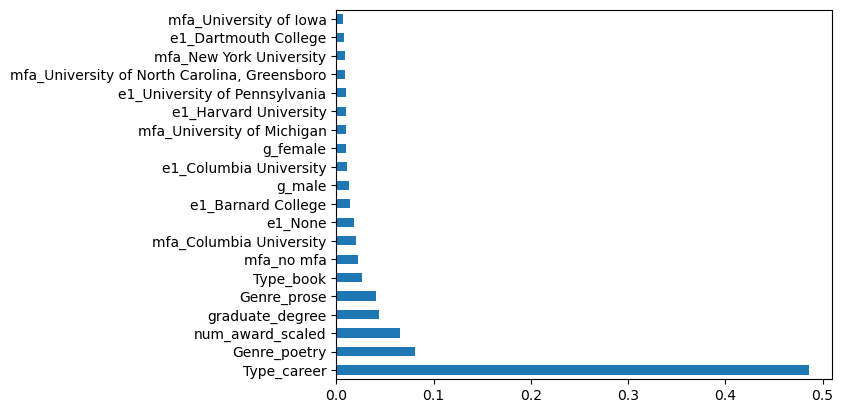

In [115]:
model_ranks=pd.Series(forest.feature_importances_, index=X_tr.columns, name='Importance').sort_values(ascending=False)
top_twenty = model_ranks[0:20]
ax=top_twenty.plot(kind='barh')

In [116]:
top_twenty

Type_career                                     0.485539
Genre_poetry                                    0.080896
num_award_scaled                                0.065641
graduate_degree                                 0.043826
Genre_prose                                     0.040382
Type_book                                       0.026200
mfa_no mfa                                      0.022415
mfa_Columbia University                         0.020748
e1_None                                         0.018221
e1_Barnard College                              0.014034
g_male                                          0.012756
e1_Columbia University                          0.010702
g_female                                        0.010319
mfa_University of Michigan                      0.010258
e1_Harvard University                           0.009971
e1_University of Pennsylvania                   0.009780
mfa_University of North Carolina, Greensboro    0.009337
mfa_New York University        

Some intersting finds here. Of course career award types is at the front since we determined that there were 3x the amount of awards and 10x the amount of career earnings. But below that, we've got poetry coming out as ahead of prose, female barely ahead of male, not having an MFA ahead of all other MFAs. But I think the biggest discovery is that getting an MFA from Columbia University is more than 2.5 times more impactful for total career money than getting an MFA from Iowa.  

Let me try one more regression model using XGBoost! 

In [119]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=12)
xgb_reg.fit(X_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=12, ...)

In [120]:
xgb_pred = xgb_reg.predict(X_te)

In [121]:
xgb_mse = mean_squared_error(y_te, xgb_pred)
print('XGBoost Regressor MSE: {}'.format(xgb_mse))

XGBoost Regressor MSE: 0.8676031511107465


In [130]:
xgb_score = xgb_reg.score(X_te, y_te)
print('XGBoost R-squared Score: {}'.format(xgb_score))

XGBoost R-squared Score: 0.144558423831325


<Figure size 2000x4000 with 0 Axes>

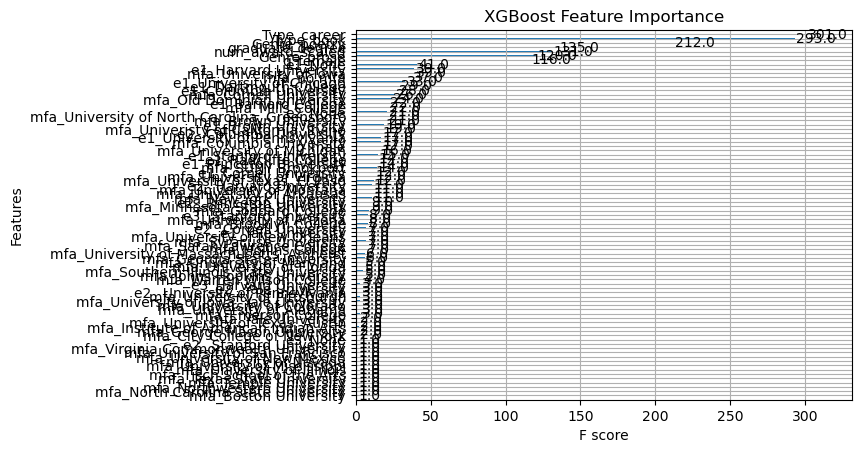

In [128]:
plt.figure(figsize=(20, 40))
xgb.plot_importance(xgb_reg, importance_type='weight')  # You can also use 'gain', 'cover', or 'total_gain'
plt.title("XGBoost Feature Importance")
plt.show();

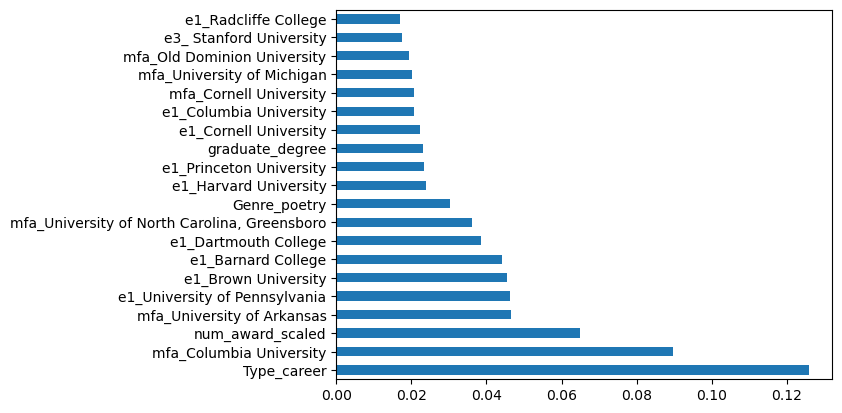

In [125]:
#That graph didn't look too good

xgb_model_ranks=pd.Series(xgb_reg.feature_importances_, index=X_tr.columns, name='Importance').sort_values(ascending=False)
xgb_top_twenty = xgb_model_ranks[0:20]
ax=xgb_top_twenty.plot(kind='barh')

This is a different set than the Random Forest Features! But the R-squared score is lower so I think I'm going to stick with Random Forest.



Let's first do some cross-validation using the top 5, top 10, top 20, and all features, in hopes of doing some feature selection.

In [149]:
top_five = top_twenty.keys()[0:6]
top_ten = top_twenty.keys()[0:11]
top_20 = top_twenty.keys()

In [232]:
top_20

Index(['Type_career', 'Genre_poetry', 'num_award_scaled', 'graduate_degree',
       'Genre_prose', 'Type_book', 'mfa_no mfa', 'mfa_Columbia University',
       'e1_None', 'e1_Barnard College', 'g_male', 'e1_Columbia University',
       'g_female', 'mfa_University of Michigan', 'e1_Harvard University',
       'e1_University of Pennsylvania',
       'mfa_University of North Carolina, Greensboro',
       'mfa_New York University', 'e1_Dartmouth College',
       'mfa_University of Iowa'],
      dtype='object')

In [153]:
X_tr5 = X_tr[top_five]
X_tr10 = X_tr[top_ten]
X_tr20 = X_tr[top_20]

In [159]:
feature_sets = [X_tr5, X_tr10, X_tr20, X_tr]

In [154]:
from sklearn.model_selection import cross_val_score

In [156]:
model = RandomForestRegressor(n_estimators=100, random_state=22)

In [160]:
#First looking at the mean squared error

scoring = 'neg_mean_squared_error'

In [165]:
feature_scores=[]
for features in feature_sets:
    scores= cross_val_score(model, features, y_train, cv=5, scoring=scoring)
    feature_scores.append(scores.mean())
    print("The Average Cross Validation Score for {} is {}".format(features, -scores.mean()))
    print("The STD for {} is: {}".format(features, scores.std()))
    

The Average Cross Validation Score for       Type_career  Genre_poetry  num_award_scaled  graduate_degree  \
652             1             0         -0.434070              1.0   
686             1             0         -0.434070              1.0   
1731            1             2          0.332038              0.0   
1535            2             1          0.332038              1.0   
667             8             9          6.460903              1.0   
...           ...           ...               ...              ...   
1345            1             0         -0.434070              1.0   
581             0             0         -0.434070              0.0   
121             1             0         -0.434070              1.0   
1262            4             4          2.630362              1.0   
681             3             1          1.098146              1.0   

      Genre_prose  Type_book  
652             0          0  
686             1          0  
1731            0          

The Average Cross Validation Score for       graduate_degree  Type_book  Type_career  Genre_poetry  Genre_prose  \
652               1.0          0            1             0            0   
686               1.0          0            1             0            1   
1731              0.0          1            1             2            0   
1535              1.0          0            2             1            0   
667               1.0          2            8             9            0   
...               ...        ...          ...           ...          ...   
1345              1.0          0            1             0            1   
581               0.0          1            0             0            1   
121               1.0          0            1             0            0   
1262              1.0          1            4             4            0   
681               1.0          0            3             1            0   

      g_female  g_male  g_nonbinary/they  mfa_Am

In [163]:
best_features = feature_sets[feature_scores.index(max(feature_scores))]
print('Best Features: {}'.format(best_features))

Best Features:       Type_career  Genre_poetry  num_award_scaled  graduate_degree  \
652             1             0         -0.434070              1.0   
686             1             0         -0.434070              1.0   
1731            1             2          0.332038              0.0   
1535            2             1          0.332038              1.0   
667             8             9          6.460903              1.0   
...           ...           ...               ...              ...   
1345            1             0         -0.434070              1.0   
581             0             0         -0.434070              0.0   
121             1             0         -0.434070              1.0   
1262            4             4          2.630362              1.0   
681             3             1          1.098146              1.0   

      Genre_prose  Type_book  
652             0          0  
686             1          0  
1731            0          1  
1535            0   

From the CV, it looks like the Top 20 give the best CV score, and the best features are Type_carrer, Genre_poetry, num_award_scaled, graduate_degree, Genre_prose, and Type_book.

Because the Genre_ feature is binary (poetry, prose), and so is the Type_ (career, book), I think I'll continue using all 20 of the top 20 features to use as I tune the Random Forest Regressor

In [166]:
#Making sure that the testing split is also only using the top 20 features.

X_te20 = X_te[top_20]

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
tuning_rfr = RandomForestRegressor(random_state=20)

In [170]:
param_grid={
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10]
}

In [173]:
grid_search = GridSearchCV(tuning_rfr, param_grid, cv=5, scoring = 'neg_mean_squared_error', n_jobs=-1)


In [174]:
grid_search.fit(X_tr20, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [175]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=20,
                      random_state=20)


In [176]:
predictions = best_model.predict(X_te20)

In [178]:
test_mse = mean_squared_error(y_te, predictions)
print('The MSE for the best model: {}'.format(test_mse))

The MSE for the best model: 0.6927878739450779


That's a lot better than before! 

In [224]:
y_te_array = np.array(y_te).flatten()

In [201]:
print(len(predictions), len(y_te_array))

355 355


In [225]:
print("Predictions:", predictions[:10])
print("y_te_array:", y_te_array[:10])

Predictions: [-0.35439201 -0.24276492 -0.2179269  -0.14204807 -0.35439201 -0.28522183
 -0.13626109  2.09896815  3.2589052   1.31443352]
y_te_array: [-0.47712914 -0.29890944 -0.19197762 -0.37019732 -0.47712914 -0.36449429
 -0.47712914  3.44370432  4.40609071  1.87537093]


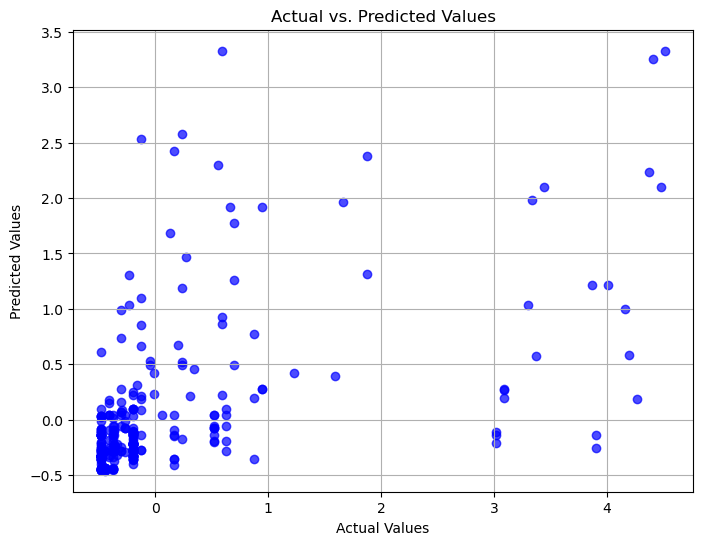

In [205]:
plt.figure(figsize=(8,6))
plt.scatter(y_te_array, predictions, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [226]:
residuals = y_te_array - predictions
residuals_1d = residuals.flatten()
print(len(residuals_1d))


355


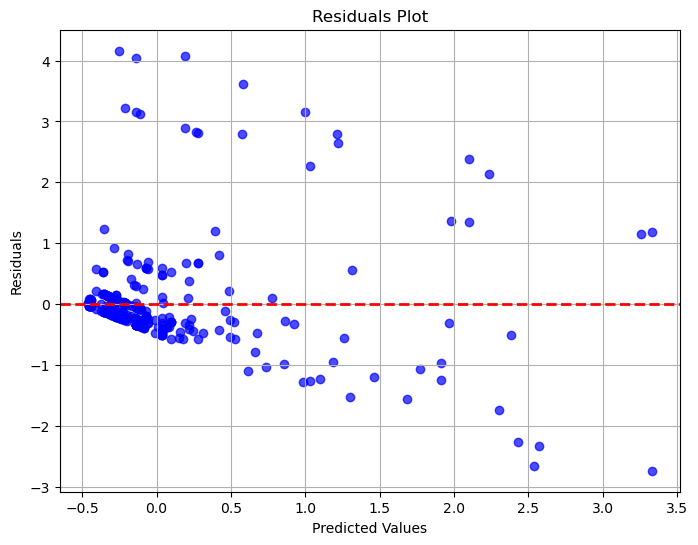

In [227]:

plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals_1d, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [228]:
feature_importance_best = best_model.feature_importances_

In [230]:
for feature_name, importance in zip(X_tr20.columns, feature_importance_best):
    print('{}: {}'.format(feature_name, importance))

Type_career: 0.7121951792756842
Genre_poetry: 0.06597728294699029
num_award_scaled: 0.03891647737908808
graduate_degree: 0.02099683504513109
Genre_prose: 0.02029881656287321
Type_book: 0.01008910905375405
mfa_no mfa: 0.021770895152112956
mfa_Columbia University: 0.028091454296002096
e1_None: 0.010623635076770785
e1_Barnard College: 0.009886641619400656
g_male: 0.007235958188746965
e1_Columbia University: 0.008318407917972899
g_female: 0.0064809754434105
mfa_University of Michigan: 0.00567801646123391
e1_Harvard University: 0.004801060944215382
e1_University of Pennsylvania: 0.010807165273870085
mfa_University of North Carolina, Greensboro: 0.008329926540102579
mfa_New York University: 0.005331373137444779
e1_Dartmouth College: 0.0028661093391050057
mfa_University of Iowa: 0.0013046803460905


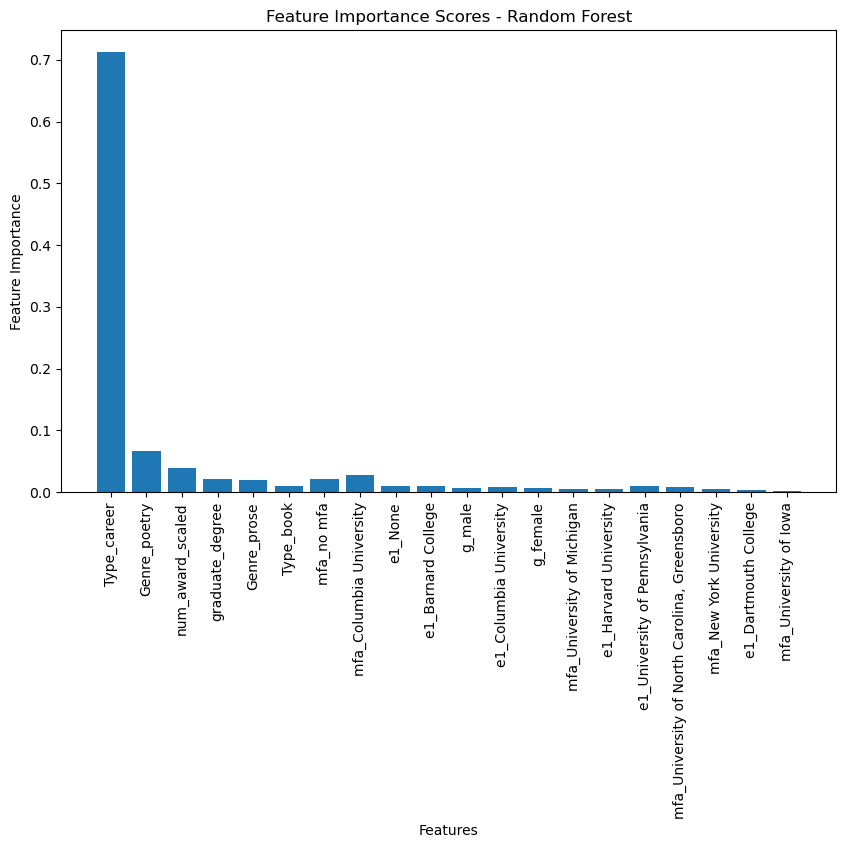

In [231]:
plt.figure(figsize=(10, 6))
plt.bar(X_tr20.columns, feature_importance_best)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores - Random Forest')
plt.xticks(rotation=90)
plt.show()

In [233]:
sorted_f= feature_importance_best.argsort()[::-1]

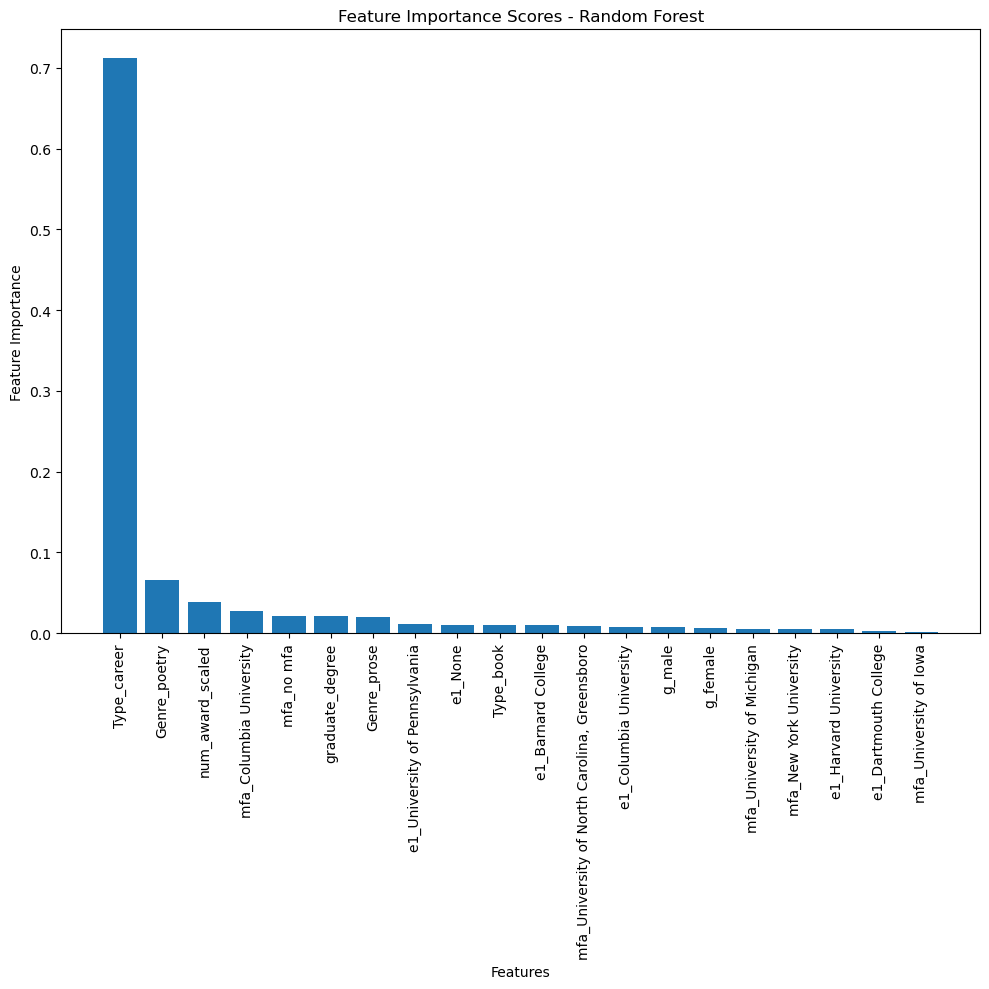

In [235]:
plt.figure(figsize=(10, 10))
plt.bar(range(len(feature_importance_best)), feature_importance_best[sorted_f])
plt.xticks(range(len(feature_importance_best)), [X_tr20.columns[i] for i in sorted_f], rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores - Random Forest')
plt.tight_layout()
plt.show()

In [236]:
dt_best = best_model.estimators_

In [239]:
len(dt_best)

100

In [240]:
for i in range(100):
    print('Parameters of Decision Tree', i)
    print(dt_best[i].get_params())

Parameters of Decision Tree 0
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 378518883, 'splitter': 'best'}
Parameters of Decision Tree 1
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 1663920602, 'splitter': 'best'}
Parameters of Decision Tree 2
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 1708167439, 'splitter': 'best'}
Parameters of Decision Tree 3
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_

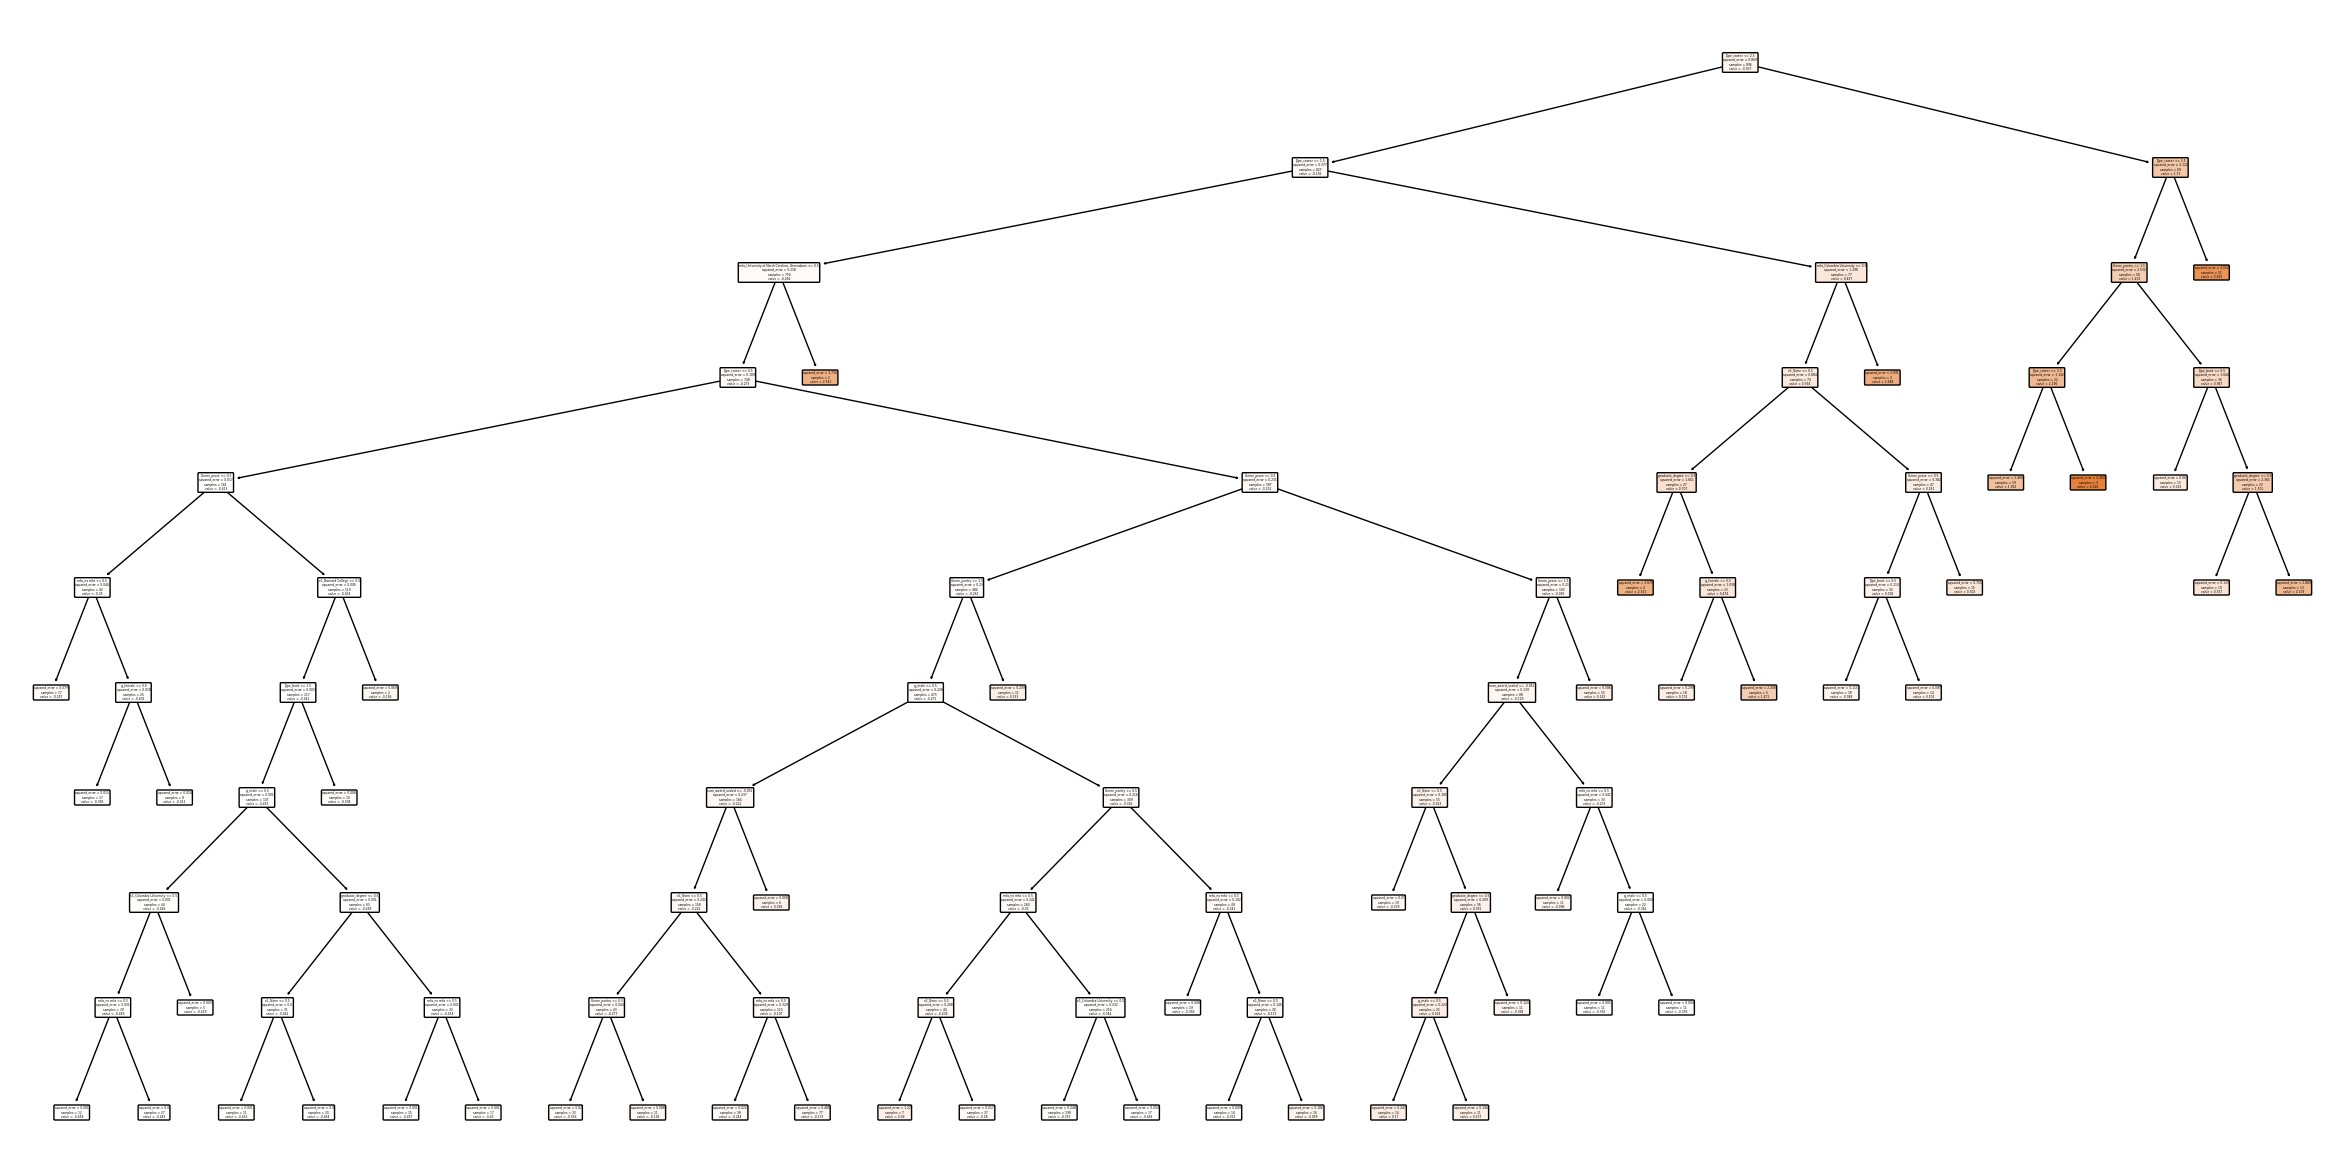

In [253]:
plt.figure(figsize=(30,15))
plot_tree(best_model.estimators_[0], feature_names=X_tr20.columns, filled=True, rounded=True)
plt.savefig('decision_tree_visualization.svg', format='svg')
plt.show()

Extra practice...

XGBoostClassifier 

I'm going to see how accurate a model can predict where someone got their MFA based on the number of awards, gender, and amount of money won. We're going to have to create a new predictor and target, though.

In [94]:
authors = pd.read_csv('author_sum.csv')

In [95]:
authors[authors['gender']=='unknown']

,Unnamed: 0,person_id,full_name,gender,graduate_degree,mfa_degree,award,prize_amount
1328,1328,1807.0,Pauline Hanson,unknown,0,no mfa,1.0,10000.0
1393,1393,1891.0,Reuben Bercovitch,unknown,0,no mfa,1.0,10000.0


In [96]:
authors.loc[1328, 'gender']='female'

In [97]:
authors.loc[1328]

Unnamed: 0                   1328
person_id                  1807.0
full_name          Pauline Hanson
gender                     female
graduate_degree                 0
mfa_degree                 no mfa
award                         1.0
prize_amount              10000.0
Name: 1328, dtype: object

In [98]:
authors.loc[1393, 'gender']='male'
authors.loc[1393]

Unnamed: 0                      1393
person_id                     1891.0
full_name          Reuben Bercovitch
gender                          male
graduate_degree                    0
mfa_degree                    no mfa
award                            1.0
prize_amount                 10000.0
Name: 1393, dtype: object

In [99]:
authors=pd.get_dummies(authors,columns=['gender'], prefix='gender')

In [100]:
authors.head()

,Unnamed: 0,person_id,full_name,graduate_degree,mfa_degree,award,prize_amount,gender_female,gender_male,gender_nonbinary/they
0,0,1.0,A. B. Guthrie Jr,0,no mfa,1.0,15000.0,0,1,0
1,1,2.0,A. E. Stallings,1,no mfa,3.0,570000.0,1,0,0
2,2,3.0,A. G. Mojtabai,1,no mfa,2.0,20000.0,1,0,0
3,3,4.0,A. J. Verdelle,1,Bard College,2.0,70000.0,1,0,0
4,4,6.0,A. R. Ammons,1,no mfa,9.0,900000.0,0,1,0


In [101]:
predictors = authors[['award', 'prize_amount', 'gender_female', 'gender_male', 'gender_nonbinary/they']]
target = authors['mfa_degree']

In [102]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(predictors, target, test_size=0.25, random_state=16)

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train_xgb)

In [105]:
#Using the parameter of objective as Multiclass 
xg_cl = xgb.XGBClassifier(objective='multi:softprob', n_estimators=100, random_state=111)

In [106]:

xg_cl.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [107]:
from sklearn.metrics import confusion_matrix
y_pred_xgb = xg_cl.predict(X_test_xgb)
y_pred_xgb = le.inverse_transform(y_pred_xgb)
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
print(cm)
acc(y_test_xgb, y_pred_xgb)

[[  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   0   0   3]
 [  0   0   0 ...   0   0   3]
 [  0   0   0 ...   0   0 289]]


0.654627539503386

That accuracy is low, but not as low as some of my Decision Trees!